<a href="https://colab.research.google.com/github/TanushGoel/Gordon-RamsAI/blob/master/Gordon_RamsAI_name_to_recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
!unzip -q -o "recipes_data.zip"

# data sources:
# https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions -- > Food.com
# https://www.kaggle.com/gjbroughton/christmas-recipes -- >  bbcgoodfood.com
# https://eightportions.com/datasets/Recipes/#fn:1 --> multiple websites

In [1]:
import pandas as pd

recipes = pd.read_csv("recipes_data/RAW_recipes.csv")
recipes["steps"] = [eval(recipe_steps) for recipe_steps in recipes["steps"]] # convert list-formatted string into a list
recipes["steps"] = [" ".join(steps) for steps in recipes["steps"]] # turn the steps into a single string
print(len(recipes))
recipes.head()

231637


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,make a choice and proceed with recipe dependin...,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,preheat oven to 425 degrees f press dough into...,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,brown ground beef in large pot add chopped oni...,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,place potatoes in a large pot of lightly salte...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"mix all ingredients& boil for 2 1 / 2 hours , ...",my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [2]:
interactions = pd.read_csv("recipes_data/RAW_interactions.csv")
print(len(interactions))
interactions.head()

1132367


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [3]:
averaged_ratings = [] # create averaged ratings for each recipe from the interactions data
for id in recipes.id:
    all_ratings = interactions.loc[interactions['recipe_id'] == id].rating
    averaged_ratings.append(sum(all_ratings) / len(all_ratings))

In [4]:
import string 

data = pd.DataFrame({"name": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in recipes["name"]],
                     "steps": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in recipes["steps"]],  
                     "rating": averaged_ratings})
data = data[data['rating'] >= 3.25].drop('rating', axis=1) # only keep the recipes with an average rating of 3.25 or higher
del recipes, interactions, averaged_ratings
print(len(data))
data.head()

207866


,name,steps
0,arriba baked winter squash mexican style,make a choice and proceed with recipe dependin...
1,a bit different breakfast pizza,preheat oven to 425 degrees f press dough into...
2,all in the kitchen chili,brown ground beef in large pot add chopped oni...
3,alouette potatoes,place potatoes in a large pot of lightly salte...
4,amish tomato ketchup for canning,mix all ingredients boil for 2 1 2 hours or ...


# More Data

In [5]:
christmas_recipes = pd.read_json("recipes_data/christmas_recipes.json", lines=True)
christmas_recipes["Method"] = [" ".join(steps) for steps in christmas_recipes["Method"]] # turn the steps into a single string
christmas_recipes.head()

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp ...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","Put the butter, sugar, fruit, zests, juice and..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","Tip the sugar, butter, dried fruit, whole cher..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",Put the flour and 1 tsp salt into a large bowl...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",Heat oven to 190C/170 fan/gas 5 and line a 12-...


In [6]:
data = pd.concat([data, pd.DataFrame({"name": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in christmas_recipes["Name"]], 
                                      "steps": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in christmas_recipes["Method"]]})])
del christmas_recipes
print(len(data))
data.head()

209483


,name,steps
0,arriba baked winter squash mexican style,make a choice and proceed with recipe dependin...
1,a bit different breakfast pizza,preheat oven to 425 degrees f press dough into...
2,all in the kitchen chili,brown ground beef in large pot add chopped oni...
3,alouette potatoes,place potatoes in a large pot of lightly salte...
4,amish tomato ketchup for canning,mix all ingredients boil for 2 1 2 hours or ...


In [7]:
recipes1 = pd.read_json("recipes_data/recipes_raw_nosource_ar.json").T 
print(len(recipes1))
recipes1.head()

39802


,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [8]:
recipes2 = pd.read_json("recipes_data/recipes_raw_nosource_epi.json").T 
print(len(recipes2))
recipes2.head()

25323


,ingredients,picture_link,instructions,title
05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...",None,"Beat the egg whites until stiff, gradually add...",Christmas Eggnog
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,"[18 fresh chestnuts, 2 1/2 pounds veal stew me...",None,Preheat oven to 400°F. Using small sharp knife...,"Veal, Carrot and Chestnut Ragoût"
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,"[2 tablespoons unsalted butter, softened, 4 or...",3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,Preheat the oven to 350°F. Spread the softened...,Caramelized Bread Pudding with Chocolate and C...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,"[3/4 pound Stilton, crumbled (about 3 cups) an...",None,"In a food processor blend the Stilton, the cre...",Sherried Stilton and Green Peppercorn Spread
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,"[2 cups (about 9 1/2 ounces) whole almonds, to...",None,Position rack in center of oven and preheat to...,Almond-Chocolate Macaroons


In [9]:
recipes3 = pd.read_json("recipes_data/recipes_raw_nosource_fn.json").T 
print(len(recipes3))
recipes3.head()

60039


,instructions,ingredients,title,picture_link
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Toss ingredients lightly and spoon into a butt...,"[1/2 cup celery, finely chopped, 1 small green...",Grammie Hamblet's Deviled Crab,None
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Watch how to make this recipe.\nSprinkle the s...,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Infineon Raceway Baked Beans,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,"In a large saucepan, let the beans soak in eno...","[1 1/2 cups dried black beans, picked over and...",Southwestern Black Bean Dip,None
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Watch how to make this recipe.\nPreheat the ov...,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Sour Cream Noodle Bake,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Special equipment: sushi mat\nCook the brown r...,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Sushi Renovation,None


In [10]:
data = pd.concat([data, pd.DataFrame({"name": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in recipes1["title"]], 
                                      "steps": [str(s).translate(str.maketrans('', '', string.punctuation)).lower().replace("\n", " ") for s in recipes1["instructions"]]}), 
                  pd.DataFrame({"name": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in recipes2["title"]], 
                                "steps": [str(s).translate(str.maketrans('', '', string.punctuation)).lower().replace("\n", " ") for s in recipes2["instructions"]]}),
                  pd.DataFrame({"name": [str(s).translate(str.maketrans('', '', string.punctuation)).lower() for s in recipes3["title"]], 
                                "steps": [str(s).translate(str.maketrans('', '', string.punctuation)).lower().replace("\n", " ") for s in recipes3["instructions"]]})])
del recipes1, recipes2, recipes3
data = data.sample(frac=1).reset_index(drop=True) # shuffle dataframe
print(len(data))
data.head()

334647


,name,steps
0,roasted beets with cumin and mint,stir together lemon juice cumin seeds salt and...
1,gingerbread truffles,bring first 7 ingredients just to boil in heav...
2,smoked bbq pork with watercress salad,to marinate the pork in a large bowl combine t...
3,herbcrusted cod with roasted tomato and garlic...,preheat oven to 450 degrees f lightly brush a ...
4,christmas day fettuccine,soak the sundried tomatoes in warm water until...


In [11]:
data.drop_duplicates(subset="name", keep=False, inplace=True) 
print(len(data))

295580


In [12]:
import nltk
!python -m nltk.downloader all  -q

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def process_text(text):

    tokens = word_tokenize(text) # break into words
    stemmed = [porter.stem(word) for word in tokens] # stemming = process of reducing a word to its root or base --> “fishing,” “fished,” “fisher” all reduce to the stem “fish”
    stemmed.insert(0, "<start>")
    stemmed.append("<end>")

    return stemmed

data.steps = data.steps.apply(process_text)
data.name = data.name.apply(process_text)
data.head()

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


,name,steps
0,"[<start>, roast, beet, with, cumin, and, mint,...","[<start>, stir, togeth, lemon, juic, cumin, se..."
1,"[<start>, gingerbread, truffl, <end>]","[<start>, bring, first, 7, ingredi, just, to, ..."
2,"[<start>, smoke, bbq, pork, with, watercress, ...","[<start>, to, marin, the, pork, in, a, larg, b..."
3,"[<start>, herbcrust, cod, with, roast, tomato,...","[<start>, preheat, oven, to, 450, degre, f, li..."
4,"[<start>, christma, day, fettuccin, <end>]","[<start>, soak, the, sundri, tomato, in, warm,..."


In [13]:
print(data.steps.iloc[0])

['<start>', 'stir', 'togeth', 'lemon', 'juic', 'cumin', 'seed', 'salt', 'and', 'pepper', 'in', 'a', 'medium', 'bowl', 'stir', 'in', 'oil', 'and', 'let', 'stand', 'while', 'roast', 'beet', 'put', 'oven', 'rack', 'in', 'middl', 'posit', 'and', 'preheat', 'oven', 'to', '425°f', 'tightli', 'wrap', 'beet', 'in', 'a', 'doubl', 'layer', 'of', 'foil', 'and', 'roast', 'on', 'a', 'bake', 'sheet', 'until', 'tender', '1', 'to', '1', '14', 'hour', 'cool', 'to', 'warm', 'in', 'foil', 'packag', 'about', '20', 'minut', 'when', 'beet', 'are', 'cool', 'enough', 'to', 'handl', 'peel', 'them', 'discard', 'stem', 'and', 'root', 'end', 'then', 'cut', 'into', '12inchwid', 'wedg', 'toss', 'warm', 'beet', 'with', 'dress', 'stir', 'in', 'mint', 'just', 'befor', 'serv', 'stir', 'togeth', 'lemon', 'juic', 'cumin', 'seed', 'salt', 'and', 'pepper', 'in', 'a', 'medium', 'bowl', 'stir', 'in', 'oil', 'and', 'let', 'stand', 'while', 'roast', 'beet', 'put', 'oven', 'rack', 'in', 'middl', 'posit', 'and', 'preheat', 'oven

In [14]:
vocab = []
for text in data.name + data.steps:
    vocab += text
vocab = list(set(vocab))
word_to_int = dict(zip(vocab, range(1, len(vocab)+1)))
int_to_word = {v: k for k, v in word_to_int.items()}
print(len(vocab), "words in vocab")
num_words = len(vocab)+1 # add one for padding 0's
print(vocab[:100])

77121 words in vocab
['scaveng', '78ounc', 'coconuttop', 'porki', 'meanz', 'frattata', 'ispanak', 'realemon®', 'reddiwipr', 'gonzalez', 'easilt', 'demerara', 'tazo', 'cocoscotcheroo', 'quinoacrust', 'handslic', '1whole', 'piginablanket', 'affo', 'wigth', '200210f', 'rollandcut', 'frok', 'mustardorang', 'andcar', 'blueish', 'hend', 'rainbowi', 'nonspecif', '364', 'blueberrybuttermilk', 'maplecardamom', 'milkflour', 'timey', 'syrupy', 'scratchproof', 'juicesb', 'spider¿', 'cauli', 'juicerum', 'lorac', 'breeze®', 'whalaa', 'drool', 'pobr', 'taqueria', 'wellyield', 'isoscel', 'wellspac', 'redroast', 'rhumlet', 'patato', 'driedand', 'cilantromint', 'mmmm', 'pearalmond', 'ho0ney', 'kiwifuit', 'overshoot', 'balsamicagav', 'pindur', 'chica', 'brujo', 'meatonion', 'cucrv', '1inchlong', 'softfirm', 'dhaniya', 'coccasion', 'poatao', 'suraac', 'visnevski', 'caipirinha', 'piparkakut', 'kaffeehau', 'aid', 'sophi', 'swatch', 'bubbleteasuppli', 'batindshan', 'tippi', 'spoon—they', 'deerelkmoos', 'mout

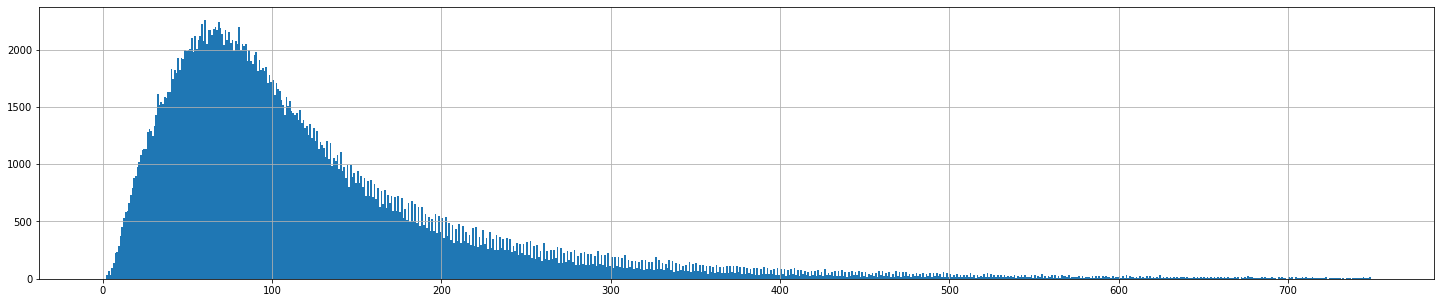

In [15]:
import numpy as np

# visualize amount of words in recipe steps
pd.DataFrame([len(text) for text in data.steps])[0].hist(bins=np.arange(start=0, stop=750, step=1), figsize=[25,5])

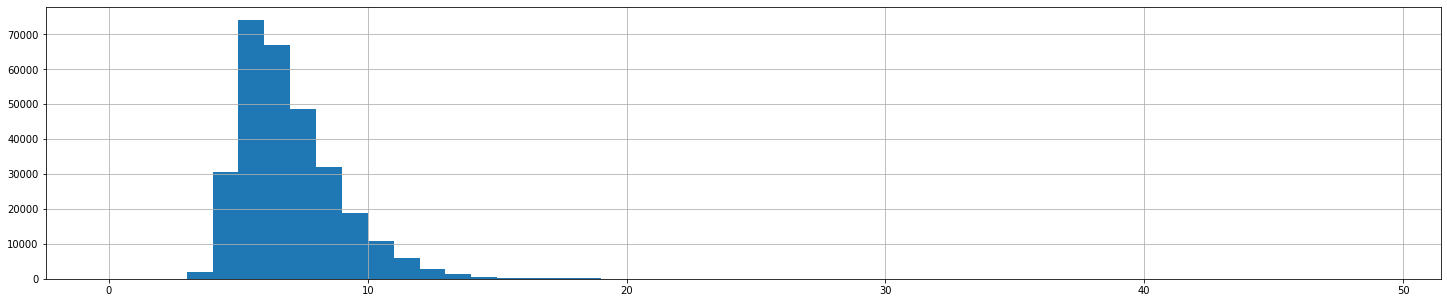

In [16]:
# visualize amount of words in recipe names
pd.DataFrame([len(text) for text in data.name])[0].hist(bins=np.arange(start=0, stop=50, step=1), figsize=[25,5])

In [17]:
max_steps_len = 256
max_name_len = 16

data = data[data['steps'].str.len().le(max_steps_len)] 
data = data[data['name'].str.len().le(max_name_len)] 
len(data)

268282

In [18]:
print(data.steps.map(lambda x: len(x)).max()) # max_steps_len
print(data.name.map(lambda x: len(x)).max()) # max_name_len

256
16


# Model

In [19]:
# bidirectional lstm model

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import initializers

encoder_in = layers.Input(shape=(max_name_len,), dtype='int32', name='encoder_in')

# encode the input sequence into a sequence of dense n-dimensional vectors
embed_encoder = layers.Embedding(output_dim=32, input_dim=num_words, input_length=max_name_len)(encoder_in) 

# use LSTM to transform the vector sequence into a single vector containing information about the entire sequence
lstm_encoder = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(64, return_sequences=True, kernel_initializer=initializers.RandomNormal(stddev=0.2), bias_initializer=initializers.Zeros()))(embed_encoder)
activation1_encoder = layers.PReLU()(lstm_encoder)
dropout1_encoder = layers.Dropout(0.1)(activation1_encoder)

decoder_in = layers.Input(shape=(max_steps_len,), dtype='int32', name='decoder_in')

# encode the input sequence into a sequence of dense n-dimensional vectors
embed_decoder = layers.Embedding(output_dim=128, input_dim=num_words, input_length=max_name_len)(decoder_in) 

# concat encoder output with steps embeddings
concat = layers.concatenate([dropout1_encoder, embed_decoder], axis=1)

# use LSTM to transform the vector sequence into a single vector containing information about the entire sequence
lstm_decoder = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(256, return_sequences=True, kernel_initializer=initializers.RandomNormal(stddev=0.2), bias_initializer=initializers.Zeros()))(concat)
activation1_decoder = layers.PReLU()(lstm_decoder)
dropout1_decoder = layers.Dropout(0.1)(activation1_decoder)
lstm_decoder = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(512, return_sequences=True, kernel_initializer=initializers.RandomNormal(stddev=0.2), bias_initializer=initializers.Zeros()))(dropout1_decoder)
activation2_decoder = layers.PReLU()(dropout1_decoder)
dropout2_decoder = layers.Dropout(0.1)(activation2_decoder)
lstm_decoder = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(256, return_sequences=True, kernel_initializer=initializers.RandomNormal(stddev=0.2), bias_initializer=initializers.Zeros()))(dropout2_decoder)
activation3_decoder = layers.PReLU()(lstm_decoder)
dropout3_decoder = layers.Dropout(0.1)(activation3_decoder)

# turn into vector
decoded_vec = layers.GlobalAveragePooling1D()(dropout3_decoder)

# dense layers 
dense1 = layers.Dense(512, activation='relu')(decoded_vec)
dropout1_dense = layers.Dropout(0.1)(dense1)
dense2 = layers.Dense(256, activation='relu')(dropout1_dense)

# output
output = layers.Dense(num_words, activation="softmax", name='output')(dense2) 

model = Model(inputs=[encoder_in, decoder_in], outputs=[output])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_in (InputLayer)         [(None, 16)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 16, 32)       2467904     encoder_in[0][0]                 
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 16, 128)      50176       embedding[0][0]                  
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 16, 128)      2048        bidirectional[0][0]              
_______________________________________________________________________________________

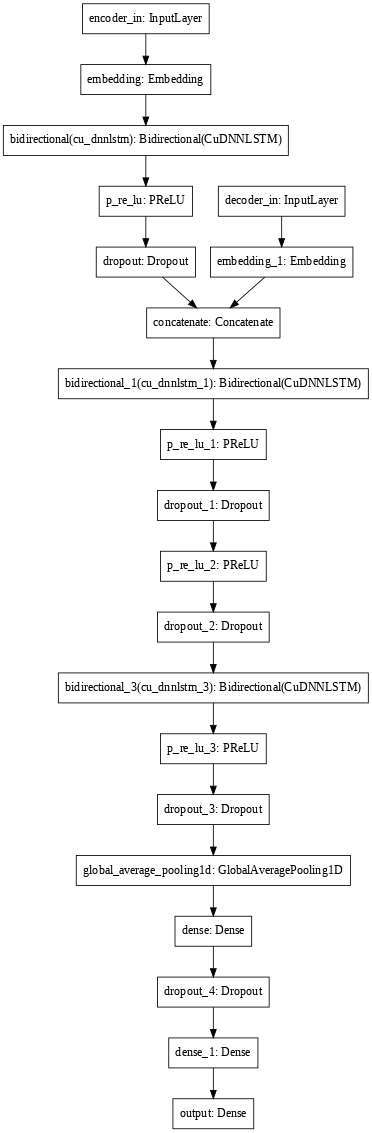

In [20]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=60)

In [21]:
model.compile(optimizer = 'adam', 
              loss = {'output': 'categorical_crossentropy'},
              metrics = {'output': "accuracy"}) 

# Train

In [22]:
def make_sequence_steps(text):

    seqs = []
    for words in text:
        seq = [word_to_int[word] for word in words]
        while len(seq) != max_steps_len:
            seq.append(0)
        seqs.append(seq)
    return seqs

def make_sequence_name(text):

    seqs = []
    for words in text:
        seq = [word_to_int[word] for word in words]
        while len(seq) != max_name_len:
            seq.append(0)
        seqs.append(seq)
    return seqs

In [23]:
batch_siz = 5000

def make_data(df, start1, start2):

    last = False
    steps_broken = []
    next_words = []
    names = []
    for idx in range(start1, len(df)): # start from where left off until end of data
        steps = df.steps.iloc[idx] # ["<start>", "preheat", "oven", ... , "<end>"]
        for cutoff in range(start2, len(steps)-1): # start from where left off until end of recipe steps word list
            if len(steps_broken) < batch_siz:
                steps_broken.append(steps[:cutoff+1]) # [["<start>"], ["<start>", "preheat"], ["<start>", "preheat", "oven"], ..., ["<start>", "preheat", "oven", ...]] # does not include EOS
                next_words.append(steps[cutoff+1]) # ["preheat", "oven", ... , "<end>"] # does not include SOS
                names.append(df.name.iloc[idx]) # [[<start>, dutch, leek, casserol, <end>], [<start>, dutch, leek, casserol, <end>], [<start>, dutch, leek, casserol, <end>], ...]
            else:
                return steps_broken, next_words, names, idx, cutoff, last
        start2 = 0

    last = True
    return steps_broken, next_words, names, idx, cutoff, last

In [24]:
def make_recipe(name):

    name = name.translate(str.maketrans('', '', string.punctuation)).lower()

    name_in = process_text(name)

    if len(name_in) > 16:
        print("name has to be 14 words or less")
        return

    try:
        name_in = [word_to_int[word] for word in name_in]
    except:
        print("oops, one of the words entered is not in my vocabulary")
        return

    while len(name_in) != max_name_len:
        name_in.append(0)
    name_in = np.array(name_in, dtype="int32")

    steps_in = np.zeros(max_steps_len, dtype="int32")
    steps_in[0] = word_to_int["<start>"]

    preds = []
    for idx in range(1, max_steps_len):

        pred_int = np.argmax(model.predict({'encoder_in': name_in.reshape(1, max_name_len,), 
                                            'decoder_in': steps_in.reshape(1, max_steps_len,)}))
        next_pred_word = int_to_word[pred_int]

        if next_pred_word == "<end>":
            return preds
        else:
            preds.append(next_pred_word)

        steps_in[idx] = pred_int
        
    return ' '.join(preds)

In [ ]:
epochz = 1

for epoch in range(epochz): 

    #batch_num = 0

    print("\nStarting Epoch:", epoch+1)

    start1 = 0
    start2 = 0
    while True:

        #if batch_num % 100 == 0:
            #print(make_recipe("Santa's Christmas Chocolate-Chip Cookies"))
        #batch_num += 1

        steps, next_words, names, start1, start2, last = make_data(data, start1, start2)

        names_seqs = np.array(make_sequence_name(names), dtype="int32")
        steps_seqs = np.array(make_sequence_steps(steps), dtype="int32")
        next_words = tf.keras.utils.to_categorical([word_to_int[word] for word in next_words], num_classes=num_words, dtype='int32')

        model.fit({'encoder_in': names_seqs, 
                   'decoder_in': steps_seqs},
                  {'output': next_words},
                  shuffle=True, 
                  epochs=1, 
                  batch_size=512)

        if last:
            break

In [ ]:
model.save_weights("gordon-ramsAI.hdf5")
from google.colab import files
files.download("gordon-ramsAI.hdf5")

# Make New Recipes

In [ ]:
make_recipe("Veggie Burrito")